<a href="https://colab.research.google.com/github/niqolla/bayesian_statistics_bioinformatics/blob/main/3_AirBNB_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
nikola

In [ ]:
import pandas as pd
import seaborn as sns
import statistics
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


#1 
---


In [ ]:
url = input("Please paste url of listing csv data:")
# url = 'http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2022-12-05/visualisations/listings.csv'
df = pd.read_csv(url)

Please paste url of listing csv data:http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2022-12-05/visualisations/listings.csv


In [ ]:
# removing columns that are irrelevant to the analysis
df.drop(columns=['id', 'name', 'host_id', 'host_name', 'license'], inplace=True)

### Split train and test

> This code imports the train_test_split function from the sklearn.model_selection module. It then creates a new DataFrame called train_data by randomly sampling 1000 rows from the df DataFrame, which is assumed to contain columns for latitude, longitude, and neighbourhood. The random_state parameter is set to 42 to ensure reproducibility of the sampling process.

> Next, the code extracts the latitude and longitude columns from the train_data DataFrame and assigns them to the X_train variable. The y_train variable is assigned the neighbourhood column from the train_data DataFrame. These two variables are used as input to the train_test_split function to split the data into training and testing sets, which can be used for model training and evaluation.

In [ ]:
from sklearn.model_selection import train_test_split

train_data = df[['latitude', 'longitude', 'neighbourhood']].sample(n=1000, random_state=42)
X_train = train_data[['latitude', 'longitude']]
y_train = train_data['neighbourhood']


### Set hyperparameters

>knn_params is a dictionary containing different values for the n_neighbors hyperparameter used in the K-Nearest Neighbors algorithm. dt_params contains different values for the max_depth hyperparameter used in the Decision Tree algorithm. rf_params contains different values for both the n_estimators and max_depth hyperparameters used in the Random Forest algorithm.

>test_data is a dataframe that contains the same columns as train_data but with the rows that were used for the training data removed. X_test contains the 'latitude' and 'longitude' columns of test_data, while y_test contains the corresponding 'neighbourhood' column.



In [ ]:
knn_params = {'n_neighbors': [3, 5, 7]}
dt_params = {'max_depth': [5, 10, 15]}
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15]}

>This code creates a test set from the original dataset df. It first selects only the columns 'latitude', 'longitude', and 'neighbourhood' and then removes the indices from the train_data set, which leaves only the remaining samples for the test set. The resulting test_data dataframe is then used to create the input features for the test set X_test (latitude and longitude) and the target variable y_test (neighbourhood).

In [ ]:
test_data = df[['latitude', 'longitude', 'neighbourhood']].drop(train_data.index)
X_test = test_data[['latitude', 'longitude']]
y_test = test_data['neighbourhood']

### Perform classification

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
# knn_grid.fit(X_train[:1000], y_train[:1000])
knn_grid.fit(X_train, y_train)


dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')
# dt_grid.fit(X_train[:1000], y_train[:1000])
dt_grid.fit(X_train, y_train)


rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
# rf_grid.fit(X_train[:1000], y_train[:1000])
rf_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

> This code imports the GridSearchCV function from scikit-learn's model_selection module and three different classifiers from the neighbors, tree, and ensemble submodules.

> It then initializes each classifier with its default hyperparameters, creates a GridSearchCV object for each classifier with the specified hyperparameter ranges, performs a cross-validation grid search using the specified parameters and scoring metric, and saves the results in the corresponding grid search object.

> The commented out lines with the fit method would run a grid search on a smaller subset of the training data, whereas the currently active lines fit a grid search on the full training data set.

In [ ]:
knn_preds = knn_grid.predict(X_test)
dt_preds = dt_grid.predict(X_test)
rf_preds = rf_grid.predict(X_test)

> This code applies the trained models (k-Nearest Neighbors, Decision Tree, and Random Forest) to the test data (X_test) to generate predictions for the target variable (y_test). The predictions are stored in knn_preds, dt_preds, and rf_preds, respectively.


### Get scores of different classifiers

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

knn_acc = accuracy_score(y_test, knn_preds)
knn_prec = precision_score(y_test, knn_preds, average='weighted')
knn_rec = recall_score(y_test, knn_preds, average='weighted')
print("KNN Accuracy: ", knn_acc)
print("KNN Precision: ", knn_prec)
print("KNN Recall:", knn_rec)
print("KNN Best Hyperparameters: ", knn_grid.best_params_, '\n')


dt_acc = accuracy_score(y_test, dt_preds)
dt_prec = precision_score(y_test, dt_preds, average='weighted')
dt_rec = recall_score(y_test, dt_preds, average='weighted')
print("Decision Tree Accuracy: ", dt_acc)
print("Decision Tree Precision: ", dt_prec)
print("Decision Tree Recall: ", dt_rec)
print("Decision Tree Best Hyperparameters: ", dt_grid.best_params_, '\n')


rf_acc = accuracy_score(y_test, rf_preds)
rf_prec = precision_score(y_test, rf_preds, average='weighted')
rf_rec = recall_score(y_test, rf_preds, average='weighted')
print("Random Forest Accuracy: ", rf_acc)
print("Random Forest Precision: ", rf_prec)
print("Random Forest Recall: ", rf_rec)
print("Random Forest Best Hyperparameters: ", rf_grid.best_params_)


KNN Accuracy:  0.9440523325873644
KNN Precision:  0.9452823774898652
KNN Recall: 0.9440523325873644
KNN Best Hyperparameters:  {'n_neighbors': 3} 

Decision Tree Accuracy:  0.930108452401446
Decision Tree Precision:  0.9315594385696265
Decision Tree Recall:  0.930108452401446
Decision Tree Best Hyperparameters:  {'max_depth': 10} 

Random Forest Accuracy:  0.9505939060079187
Random Forest Precision:  0.9514585666710735
Random Forest Recall:  0.9505939060079187
Random Forest Best Hyperparameters:  {'max_depth': 15, 'n_estimators': 200}


> This code calculates the accuracy, precision, and recall scores for the KNN, Decision Tree, and Random Forest models on the test data. The accuracy_score(), precision_score(), and recall_score() functions are imported from sklearn.metrics. For each model, these metrics are calculated and printed to the console, along with the best hyperparameters for each model as determined by GridSearchCV.

The clustering analysis utilized three models, namely K-Nearest Neighbors (KNN), Decision Tree, and Random Forest, to evaluate Airbnb listings in a specific region using various features. The models were assessed using three metrics: accuracy, precision, and recall. The Random Forest model achieved the highest scores among the three models, with an accuracy of 0.951, precision of 0.951, and recall of 0.951. The KNN model also performed well, with an accuracy of 0.944, precision of 0.945, and recall of 0.944. Conversely, the Decision Tree model had the lowest scores, with an accuracy of 0.930, precision of 0.932, and recall of 0.930.

The variation in model performance could be attributed to the complexity of the models. Random Forests are a combination of multiple decision trees, which can reduce the impact of overfitting and increase accuracy. On the other hand, Decision Trees may have a tendency to overfit the data, leading to lower accuracy. The KNN model uses a distance-based approach to classify instances and may perform better in datasets with clear boundaries between classes. Additionally, the relevance of the features in predicting the outcome could be another explanation for the performance differences. Some variables may be more important than others, and certain models may be better at identifying those variables. Hence, conducting feature selection and analysis could help identify the most important variables for prediction.

Regarding hyperparameters, the KNN model achieved the best performance with a value of 3 for the n_neighbors parameter, indicating that it considered the three nearest neighbors to make predictions. The Decision Tree model had the best performance with a maximum depth of 10, indicating that further increasing the depth did not improve its performance significantly. The Random Forest model achieved the best performance with a maximum depth of 15 and 200 estimators, indicating that using 200 decision trees was optimal for this dataset.

### Show on map

Here, I just thought it would be interesting to represent the diffrent point on a map.

In [ ]:
import folium
from folium.plugins import FastMarkerCluster
from branca.colormap import LinearColormap


In [ ]:
lats = df['latitude'].tolist()
lons = df['longitude'].tolist()
locations = list(zip(lats, lons))

map1 = folium.Map(location=[statistics.mean(lats), statistics.mean(lons)], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

#2 
---


## Preparing the data

In [ ]:
# # url1 = 'http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2022-12-05/visualisations/listings.csv'
# url1 = 'http://data.insideairbnb.com/greece/central-macedonia/thessaloniki/2022-12-27/visualisations/listings.csv'
# df1 = pd.read_csv(url1)
# df1['source'] = 1

In [ ]:
# # url2 = 'http://data.insideairbnb.com/belgium/vlg/antwerp/2022-12-29/visualisations/listings.csv'
# url2 = 'http://data.insideairbnb.com/greece/attica/athens/2022-12-27/visualisations/listings.csv'
# df2 = pd.read_csv(url2)
# df2['source'] = 2

In [ ]:
# barcelona listing

url1 = 'http://data.insideairbnb.com/spain/catalonia/barcelona/2022-12-11/visualisations/listings.csv'
df1 = pd.read_csv(url1)
df1['source'] = 1

In [ ]:
# madrid listing

url2 = 'http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2022-12-13/visualisations/listings.csv'
df2 = pd.read_csv(url2)
df2['source'] = 2

In [ ]:
print("Tables are okay to merge") if list(df1.columns) == list(df2.columns) else print("DO NOT MERGE TABLES")

Tables are okay to merge


In [ ]:
# joining the tables, removing irrelevant fields and replacing the nominal values with number is the 'room_type' field

df = pd.concat([df1, df2], ignore_index=True)
df.drop(columns=['id', 'host_id', 'host_name', 'neighbourhood_group', 'name', 'last_review'], inplace=True)
df['room_type'].replace({'Entire home/apt': 4, 'Private room': 2, 'Hotel room': 3, 'Shared room': 1}, inplace=True)
df.head()


neighbourhood  latitude  longitude  room_type  price  \
0                  la Sagrada Família  41.40556    2.17262          4    129   
1               el Besòs i el Maresme  41.41243    2.21975          4    195   
2  el Camp d'en Grassot i Gràcia Nova  41.40566    2.17015          4     73   
3                      el Barri Gòtic  41.37978    2.17623          4    174   
4                      la Barceloneta  41.38043    2.19094          2     36   

   minimum_nights  number_of_reviews  reviews_per_month  \
0               1                 33               0.28   
1               4                 65               0.45   
2               2                 83               0.60   
3               5                190               1.28   
4              31                104               0.76   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                              20               264                     11   
1                               2               255                     12   
2                               3               276                     20   
3                               1               139                     30   
4                               1               259                     19   

       license  source  
0  HUTB-002062       1  
1   HUTB005057       1  
2  HUTB-001722       1  
3  HUTB-001506       1  
4          NaN       1

In [ ]:
pd.DataFrame(df.describe()).T

count        mean          std       min  \
latitude                        36554.0   40.840258     0.481175  40.33221   
longitude                       36554.0   -1.164231     2.903274  -3.83533   
room_type                       36554.0    3.236363     0.986127   1.00000   
price                           36554.0  151.761504  1150.721632   0.00000   
minimum_nights                  36554.0   10.109072    33.293388   1.00000   
number_of_reviews               36554.0   41.877770    78.398404   0.00000   
reviews_per_month               29150.0    1.555728     1.812805   0.01000   
calculated_host_listings_count  36554.0   17.816655    36.856098   1.00000   
availability_365                36554.0  175.214587   138.577396   0.00000   
number_of_reviews_ltm           36554.0   12.789243    22.297336   0.00000   
source                          36554.0    1.568365     0.495311   1.00000   

                                     25%         50%        75%          max  
latitude                        40.41658   40.446880   41.38644     41.45956  
longitude                       -3.70246   -3.666555    2.16489      2.22771  
room_type                        2.00000    4.000000    4.00000      4.00000  
price                           47.00000   82.000000  129.00000  95150.00000  
minimum_nights                   1.00000    2.000000    5.00000   1125.00000  
number_of_reviews                1.00000    9.000000   45.00000   1476.00000  
reviews_per_month                0.28000    1.000000    2.25000     48.32000  
calculated_host_listings_count   1.00000    3.000000   15.00000    240.00000  
availability_365                25.00000  172.000000  321.00000    365.00000  
number_of_reviews_ltm            0.00000    3.000000   18.00000    682.00000  
source                           1.00000    2.000000    2.00000      2.00000

Here I check the statistics of each field. I'm mosly interested in the 'room_type' and 'price' field because they will be used for creating the clusters later. It seems like the 'price' field extremey large outliers. 

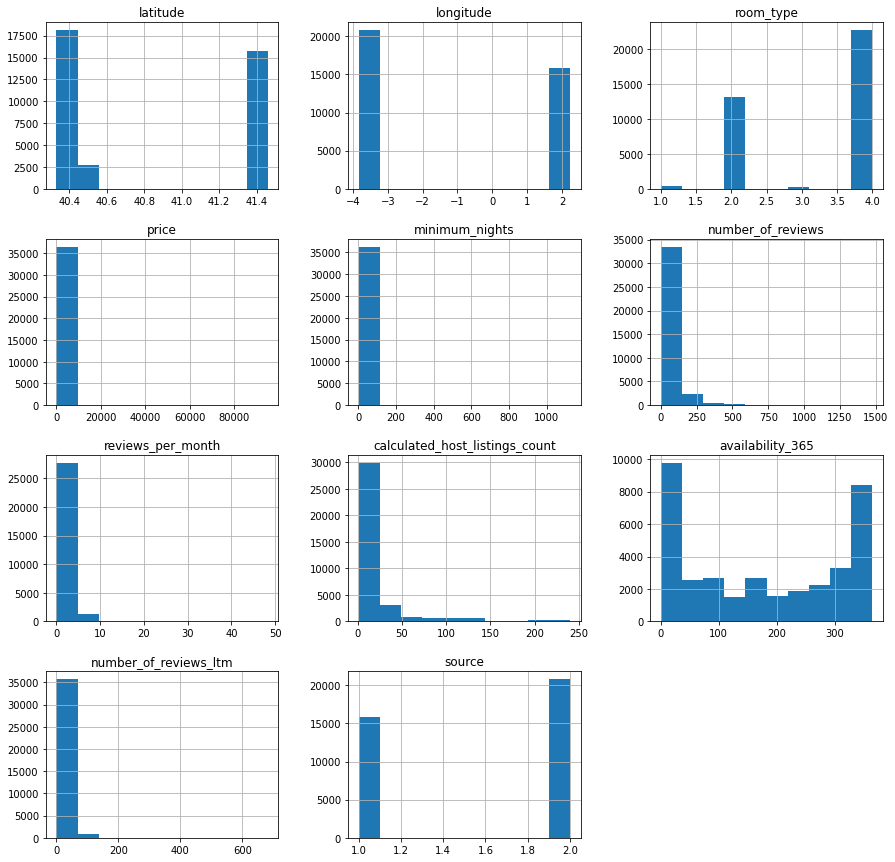

In [ ]:
# plt.figure(figsize=(15,15))
df.hist(figsize=(15,15))
plt.show()

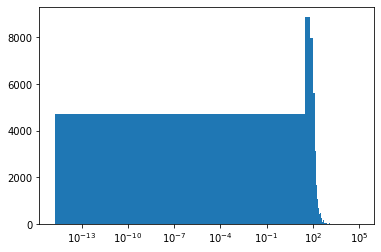

In [ ]:
plt.hist(df['price'], bins=3000)
plt.xscale('log')
plt.show()

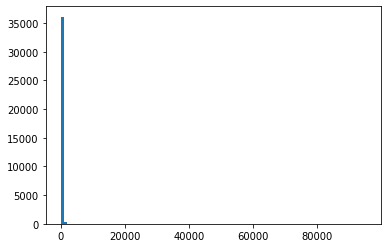

In [ ]:
plt.hist(df['price'], bins=100)
plt.show()

Removing outliers is necessary to prevent them from skewing the cluster centers and affecting the clustering results, and to ensure that clusters are formed based on genuine patterns in the data.

I did this on few listings and I concluded that the best empirical way to remove the outliers is to calculate i, as the number of enteries divided by 100, then to take that element from the end. This is the cutoff value, above of which, we do not want to keep the data because of it's interference with the clustering analysis.

In [ ]:
', '.join([str(i) for i in sorted(list(df['price']))[-int(len(df['price'])/100):]])


'1044, 1050, 1050, 1050, 1050, 1050, 1050, 1050, 1050, 1050, 1056, 1065, 1065, 1071, 1071, 1080, 1080, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1111, 1120, 1120, 1124, 1143, 1150, 1154, 1155, 1156, 1164, 1172, 1179, 1189, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1209, 1246, 1250, 1250, 1250, 1290, 1300, 1300, 1310, 1316, 1321, 1333, 1344, 1346, 1350, 1400, 1418, 1450, 1459, 1481, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1490, 1499, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 150

In [ ]:
mark = sorted(list(df['price']))[-int(len(df['price'])/100)]

In [ ]:
df = df[df['price'] <= mark]

## Visualising possible correlations

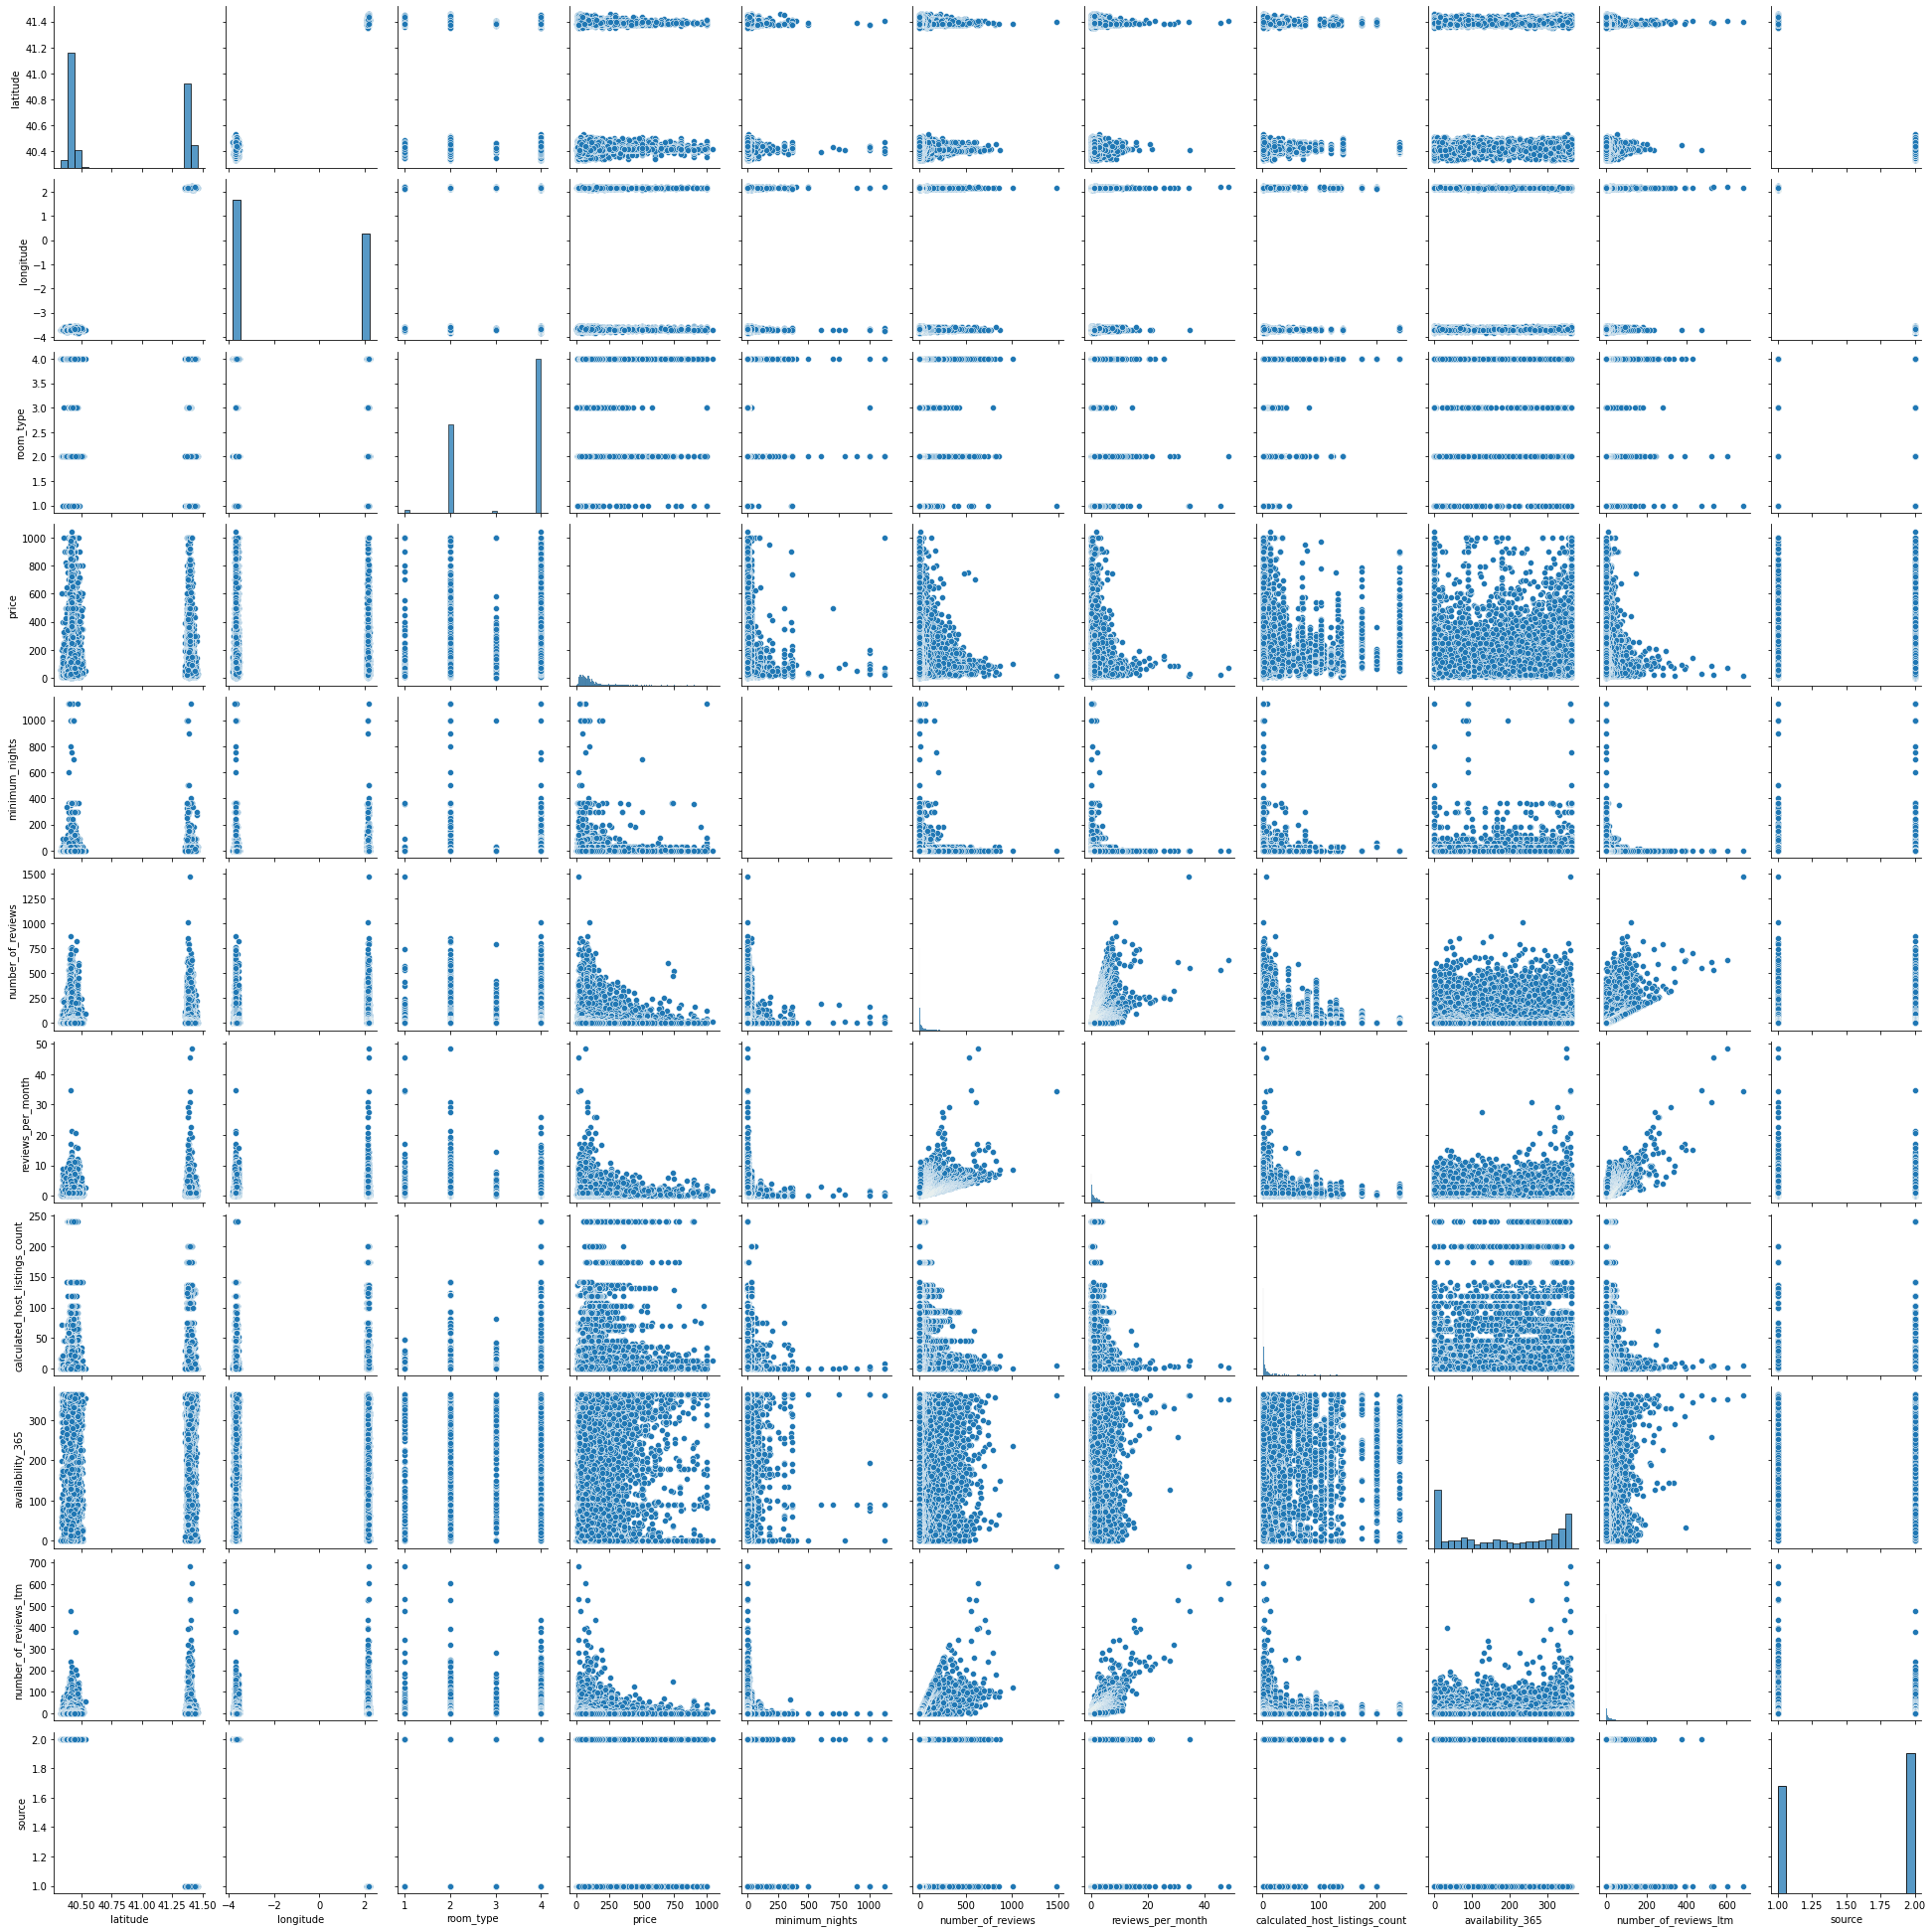

In [ ]:
sns.pairplot(df)

## In this part I will be using:


### Partitional clustering:

>Partitional clustering is a clustering algorithm where each observation is assigned to a single cluster.

>The algorithm tries to divide the dataset into k clusters, where k is a user-defined parameter.

>The popular algorithms under this category are k-means and k-medoids.

> Pros: The algorithm is simple to implement and efficient for large datasets with many variables. It's also computationally efficient and scales well to large datasets.

> Cons: Partitional clustering requires the user to predefine the number of clusters, which can be challenging when the structure of the dataset is unknown. It also struggles to handle outliers and unevenly sized clusters.


#### Performing clustering

In [ ]:
# reducing the data because with the full table it crashed (especially for the hiearchical clustering)
df = df.sample(frac=0.5, random_state=42)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Create a new dataframe with only the selected fields
subset_df = pd.DataFrame()
subset_df['price'] = df['price']

# Normalize the data to prevent any one variable from dominating the distance metric
subset_df = (subset_df - subset_df.mean()) / subset_df.std()

subset_df['room_type'] = df['room_type']

# Convert categorical variables to numerical variables using one-hot encoding
# subset_df = pd.get_dummies(subset_df, columns=['room_type'])

In [ ]:
# Create empty lists to store the inertia and silhouette scores for each value of k
inertias = []
silhouette_scores = []

# Set the range of k values to try
k_values = range(2, 9)

# Loop over each value of k
for k in k_values:
    # Initialize the KMeans model with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the data
    kmeans.fit(subset_df)
    
    # Append the inertia score to the list
    inertias.append(kmeans.inertia_)
    
    # Calculate the silhouette score and append it to the list
    silhouette_scores.append(silhouette_score(subset_df, kmeans.labels_))

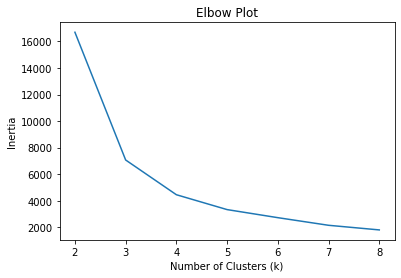

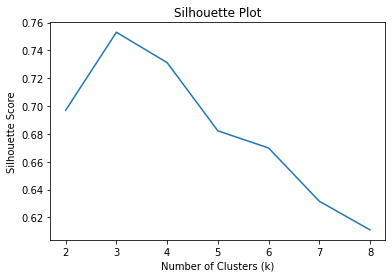

In [ ]:
# Plot the elbow plot to choose the best k value
sns.lineplot(x=k_values, y=inertias)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Plot the silhouette scores to choose the best k value
sns.lineplot(x=k_values, y=silhouette_scores)
plt.title('Silhouette Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
best_k = 3

# Train the final KMeans model with the best k value
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(subset_df)

# Add the cluster labels to the original dataframe
df['kcluster'] = kmeans.labels_

#### Distributions of clusters regarding room_type and price



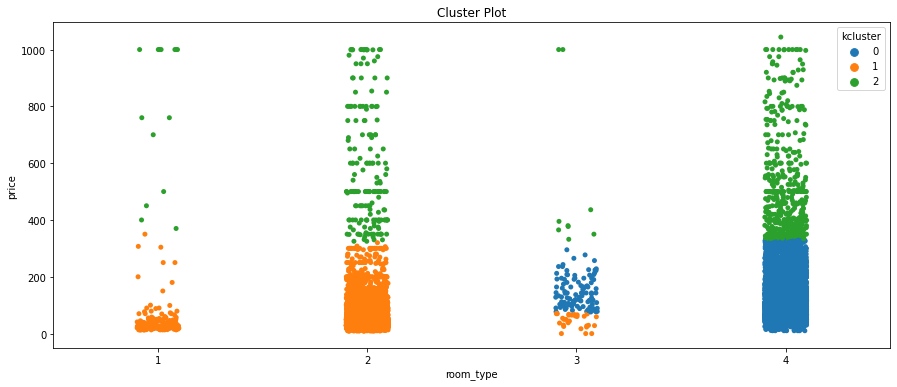


 {1: 'Shared room', 2: 'Private room', 3: 'Hotel room', 4: 'Entire home/apt'}


In [ ]:
room_type_dict = {1: 'Shared room', 2: 'Private room', 3: 'Hotel room', 4: 'Entire home/apt'}

# Plot the clusters on a scatterplot
plt.figure(figsize=(15,6))
sns.stripplot(data=df, y='price', x='room_type', hue='kcluster', jitter=True)
plt.title('Cluster Plot')
plt.xlabel('room_type')
# plt.xticks(ticks=[1, 2, 3, 4], labels=[room_type_dict[i] for i in [1, 2, 3, 4]], ha='center')
# plt.xticks(rotation=90)
plt.ylabel('price')
plt.show()
print('\n', room_type_dict)

### Hierarchical clustering:

> Hierarchical clustering is a clustering algorithm that organizes data into a tree-like structure based on the similarity between observations.

> The algorithm can be classified into two types: Agglomerative and divisive.
Agglomerative hierarchical clustering starts with individual data points as clusters and gradually merges the most similar clusters into one, forming a hierarchy.

> Divisive hierarchical clustering, on the other hand, starts with one large cluster and recursively divides it into smaller clusters.

>Pros: The algorithm is useful for small datasets where the structure is not well-defined, it doesn't require prior knowledge about the number of clusters, and can generate a dendrogram for visualization.

> Cons: Hierarchical clustering is computationally expensive and not scalable to large datasets. The algorithm is also sensitive to noise and outliers, and it's not guaranteed to produce an optimal clustering solution.


#### Performing clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# Create a new dataframe with only the selected fields
subset_df = pd.DataFrame()
subset_df['price'] = df['price']

# Normalize the data to prevent any one variable from dominating the distance metric
subset_df = (subset_df - subset_df.mean()) / subset_df.std()

subset_df['room_type'] = df['room_type']

In [ ]:
# Perform hierarchical clustering using Ward linkage
Z = linkage(subset_df, 'ward')

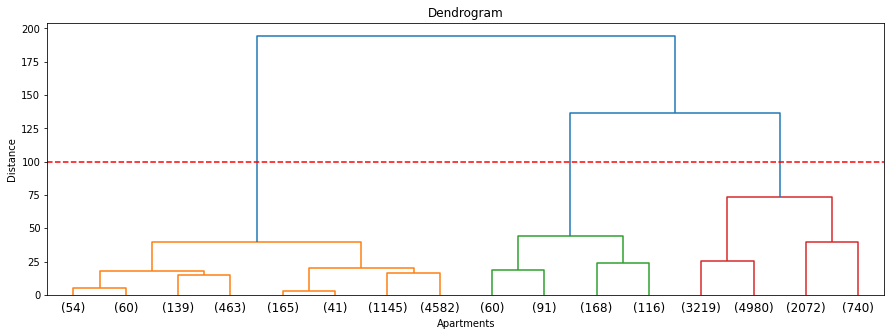

In [ ]:
# Plot the dendrogram
plt.figure(figsize=(15, 5))
dendrogram(Z, truncate_mode='level', p=3)
plt.title('Dendrogram')
plt.xlabel('Apartments')
plt.ylabel('Distance')
plt.axhline(y=100, color='r', linestyle='--')
plt.show()

In [ ]:
# Determine the number of clusters to use
n_clusters = 3

# Train the AgglomerativeClustering model with the determined number of clusters
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
hc.fit(subset_df)

# Add the cluster labels to the original dataframe
df['cluster'] = hc.labels_

#### Distributions of clusters regarding room_type and price


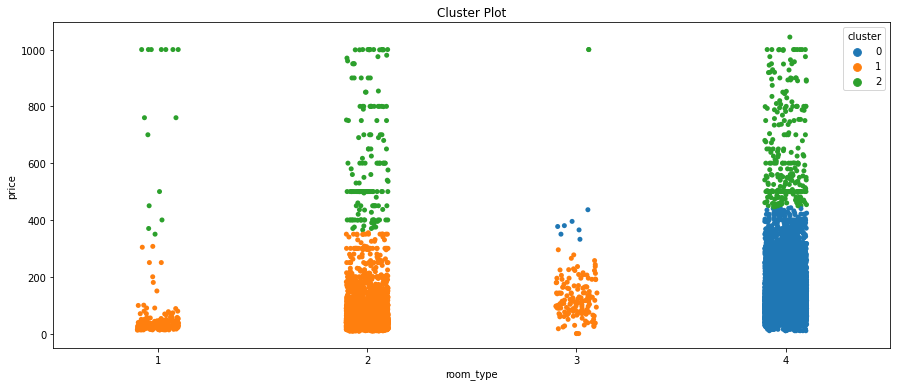


 {1: 'Shared room', 2: 'Private room', 3: 'Hotel room', 4: 'Entire home/apt'}


In [ ]:
room_type_dict = {1: 'Shared room', 2: 'Private room', 3: 'Hotel room', 4: 'Entire home/apt'}

# Plot the clusters on a scatterplot
plt.figure(figsize=(15,6))
sns.stripplot(data=df, y='price', x='room_type', hue='cluster', jitter=True)
plt.title('Cluster Plot')
plt.xlabel('room_type')
# plt.xticks(ticks=[1, 2, 3, 4], labels=[room_type_dict[i] for i in [1, 2, 3, 4]], ha='center')
# plt.xticks(rotation=90)
plt.ylabel('price')
plt.show()
print('\n', room_type_dict)

### Density-based clustering:

> Density-based clustering is a clustering algorithm that groups data points based on regions of higher density.

>The algorithm identifies regions where the density of data points exceeds a threshold and assigns them to the same cluster.

>DBSCAN is a popular density-based clustering algorithm.

> Pros: The algorithm is useful when there is no prior knowledge about the number of clusters and can handle noisy and unevenly distributed data. It also produces flexible-shaped clusters, and the number of clusters is determined based on the data's distribution.

>Cons: Density-based clustering is sensitive to the choice of hyperparameters such as the density threshold and radius. It's also computationally expensive and requires careful selection of the hyperparameters to avoid over or under-segmentation.

#### Performing clustering

In [ ]:
from sklearn.cluster import DBSCAN

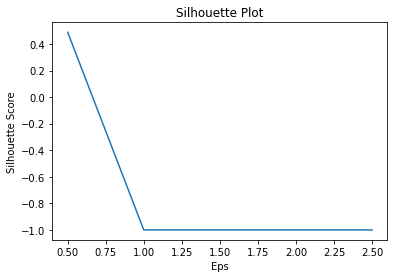

In [ ]:
# Create empty lists to store the silhouette scores for each value of eps
silhouette_scores = []

# Set the range of eps values to try
eps_values = [0.5, 1.0, 1.5, 2.0, 2.5]

# Loop over each value of eps
for eps in eps_values:
    # Initialize the DBSCAN model with the current value of eps
    dbscan = DBSCAN(eps=eps, min_samples=5)
    
    # Fit the model to the data
    dbscan.fit(subset_df)
    
    # Calculate the silhouette score and append it to the list
    if len(set(dbscan.labels_)) > 1:
        silhouette_scores.append(silhouette_score(subset_df, dbscan.labels_))
    else:
        silhouette_scores.append(-1)

# Plot the silhouette scores to choose the best eps value
sns.lineplot(x=eps_values, y=silhouette_scores)
plt.title('Silhouette Plot')
plt.xlabel('Eps')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# Train the final DBSCAN model with the best eps value
best_eps = eps_values[np.argmax(silhouette_scores)]
dbscan = DBSCAN(eps=best_eps, min_samples=5)
dbscan.fit(subset_df)

# Add the cluster labels to the original dataframe
df['dbcluster'] = dbscan.labels_


#### Distributions of clusters regarding room_type and price


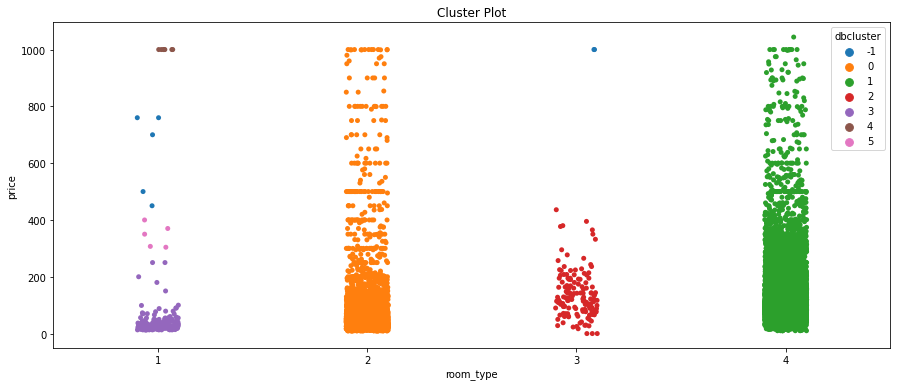


 {1: 'Shared room', 2: 'Private room', 3: 'Hotel room', 4: 'Entire home/apt'}


In [ ]:
room_type_dict = {1: 'Shared room', 2: 'Private room', 3: 'Hotel room', 4: 'Entire home/apt'}

# Plot the clusters on a scatterplot
plt.figure(figsize=(15,6))
sns.stripplot(data=df, y='price', x='room_type', hue='dbcluster', jitter=True)
plt.title('Cluster Plot')
plt.xlabel('room_type')
plt.ylabel('price')
plt.show()
print('\n', room_type_dict)

## Analysis of K-Means Clusters

If we compare the *'Distributions of clusters regarding room_type and price'* for all 3 methods of clustering, the clusters of K-Means clustering make the most sence. There are 3 catgories (best k by elbow plot) and there is no category that is insufficient. In the Hieracrchical clustering approach there seems to be a disproportion of the clusters in a way that does not make much sense. This might be a result of it's sensitivity to outliers. Finally, the DB clustering generates 7 clusters, 4 of which are part of room_type 1. This too doesn't make sense.

Therefore, in the rest of this analysis, I will only take into consideration the clusters generated from the K-Means method.

### General overview of all variables in regards to the different clusters

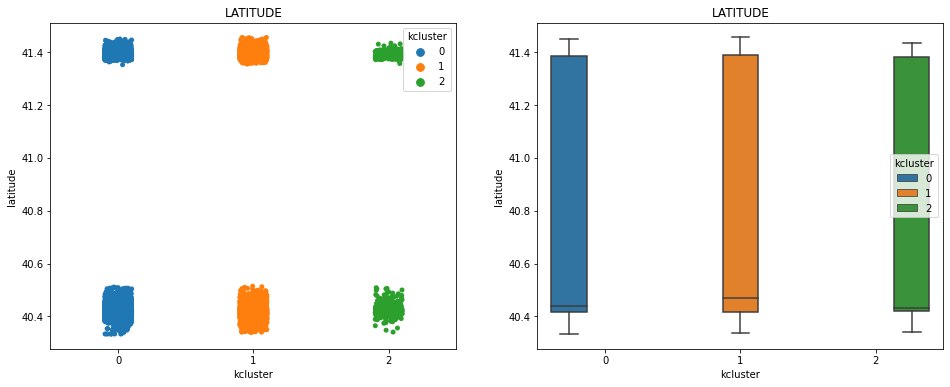

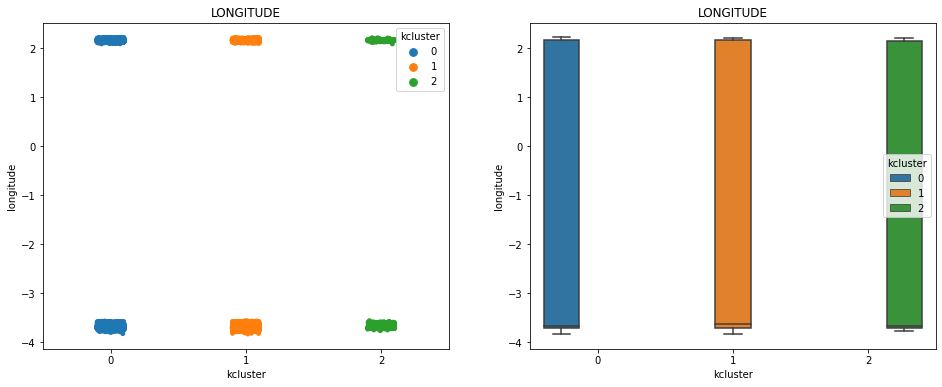

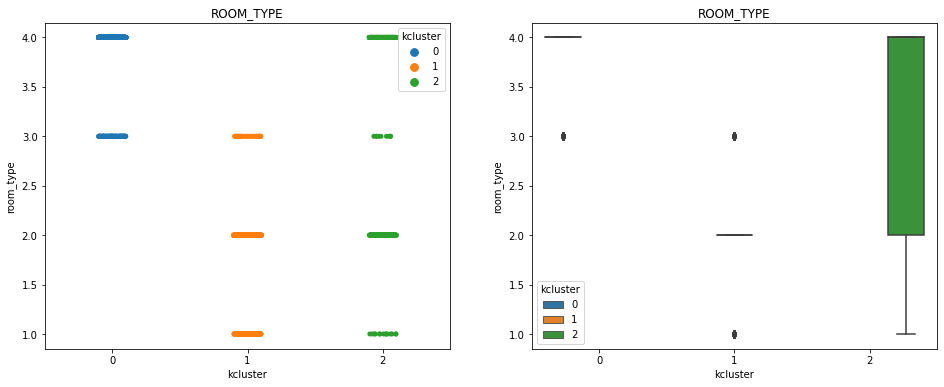

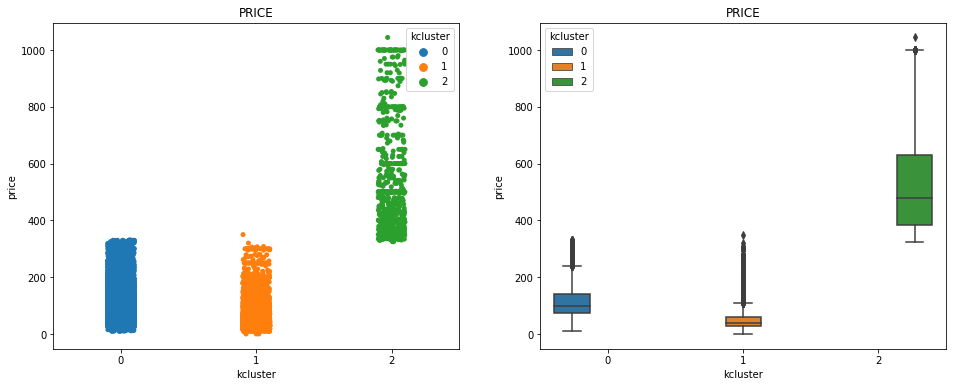

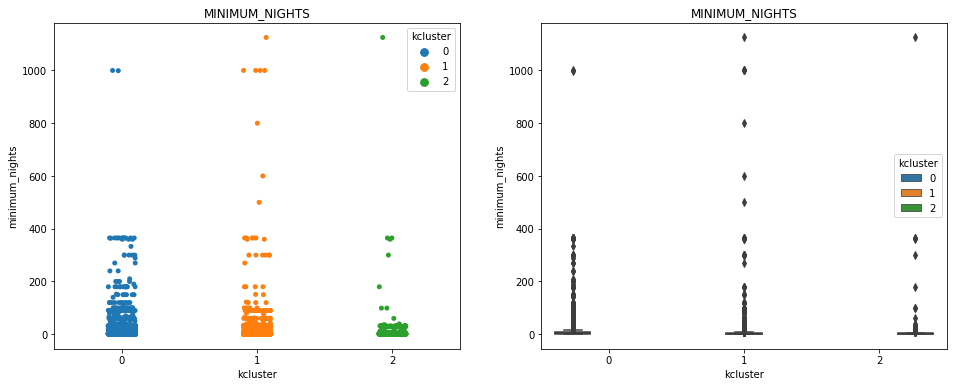

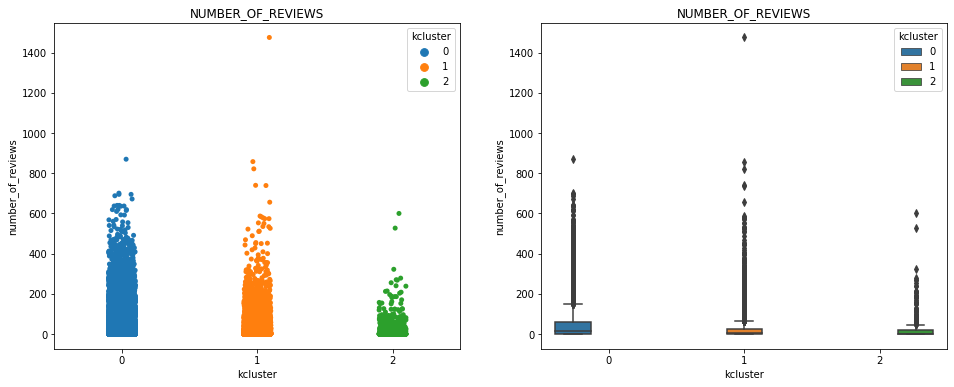

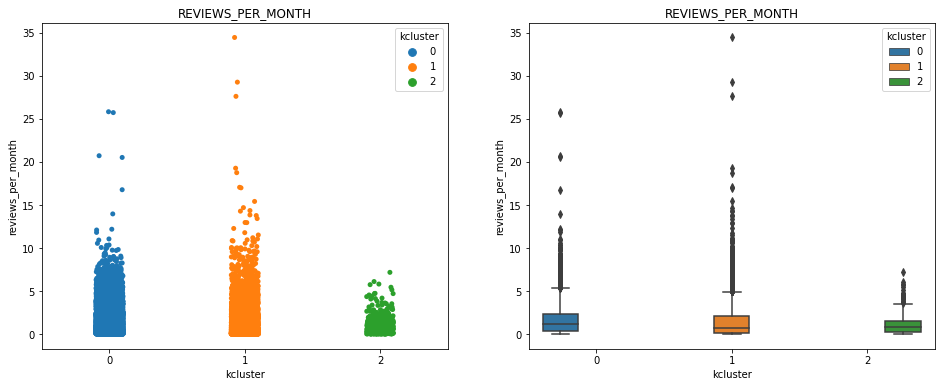

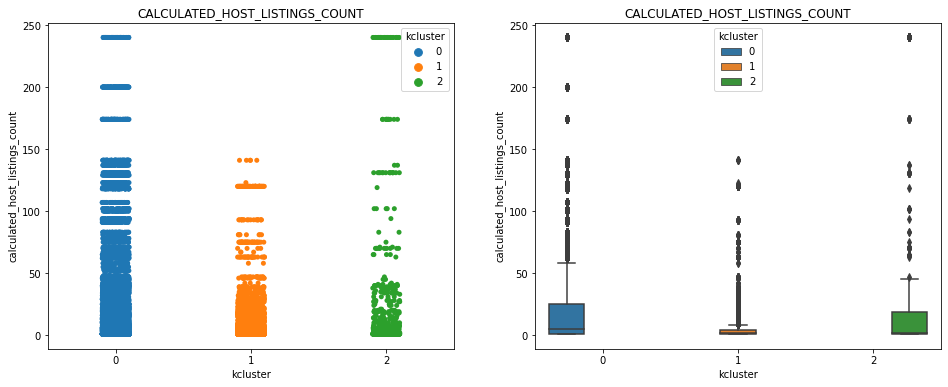

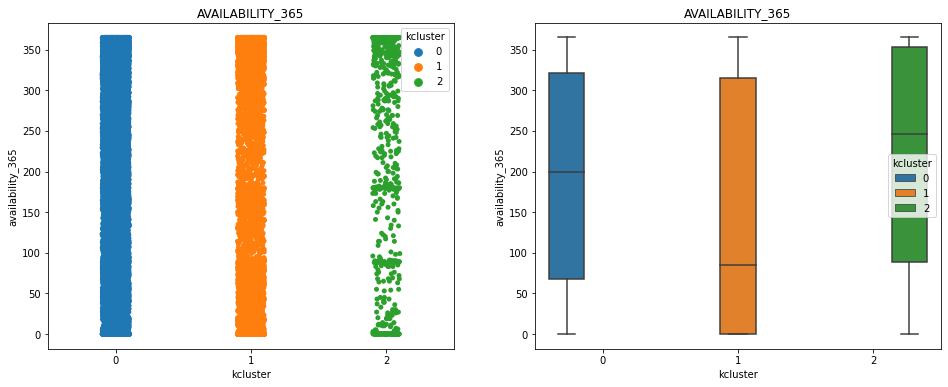

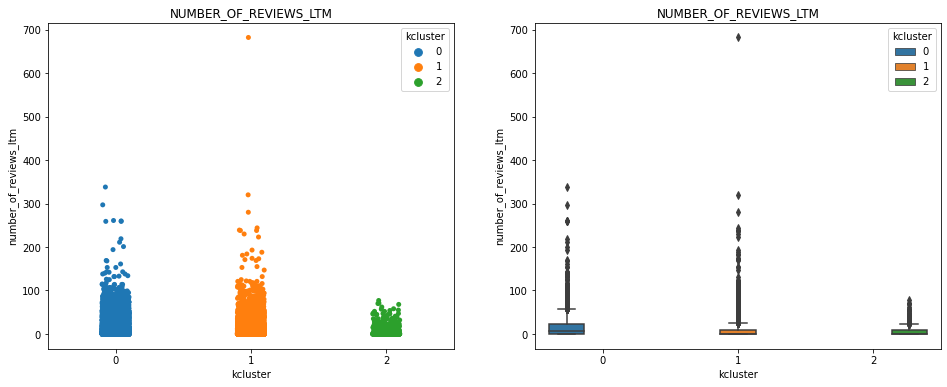

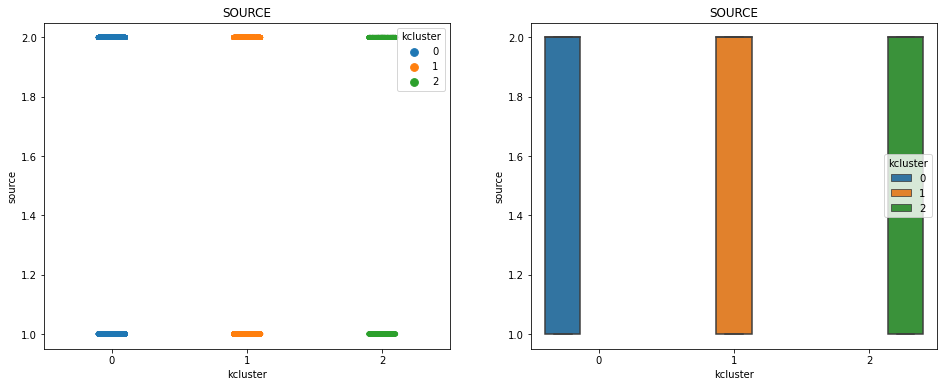

In [ ]:
fields = ['latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 
          'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 
          'number_of_reviews_ltm', 'source']

for col in fields:
  fig, axs = plt.subplots(ncols=2, figsize=(16, 6))
  # plt.figure(figsize=(9,5))
  sns.stripplot(data=df, y=col, x='kcluster', hue='kcluster', jitter=True, ax=axs[0])
  axs[0].set_title(col.upper())
  sns.boxplot(data=df, y=col, x='kcluster', hue='kcluster', ax=axs[1])
  # plt.title(col.upper())
  axs[1].set_title(col.upper())
  plt.show()


#{1: 'Shared room', 2: 'Private room', 3: 'Hotel room', 4: 'Entire home/apt'}


#### Some things that stand out:

> Regarding room types:
* Cluster 0 has :: 3: 'Hotel room', 4: 'Entire home/apt'
* Cluster 1 has :: 1: 'Shared room', 2: 'Private room', 3: 'Hotel room'
* Cluster 2 has :: all four

> Regarding price:
* Cluster 0 and 1 have around the same price  
* Cluster 2 stands out with a higher price

> Regarding number of reviews:
* Cluster 2 seems to have the least number of reviews

### Statistical report of all fields for the given clusters

###### Visual

In [ ]:
def plot_func(isin_list, field, what_we_want):
  counts, bins, _ = plt.hist(df.loc[df[field].isin(isin_list), what_we_want])

  # Calculate the total count
  total_count = sum(counts)

  # Iterate over the bins and add a text label showing the count
  for i, count in enumerate(counts):
      x = (bins[i] + bins[i+1]) / 2
      y = count
      label = f"{count/total_count*100:.1f}%"
      if count != 0:
        plt.text(x, y, label, ha='center', va='bottom')

  median_p = df.loc[df[field].isin(isin_list), what_we_want].median()
  average_p = df.loc[df[field].isin(isin_list), what_we_want].mean()
  std_p = df.loc[df[field].isin(isin_list), what_we_want].std()
  
  print(f'{isin_list} : \n ** Median {what_we_want} : {median_p} \n\
  ** Average {what_we_want}: {average_p} \n\
  ** STD {what_we_want}: {std_p}')

  # Show the plot
  plt.title(f'Total: {total_count}')
  plt.show()

  print ('================')

++++++++++++++++++LATITUDE+++++++++++++++++++++++++
[1] : 
 ** Median latitude : 40.470173048181316 
  ** Average latitude: 40.879286582520734 
  ** STD latitude: 0.48581849629768664


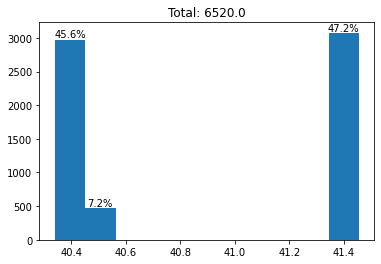

[0] : 
 ** Median latitude : 40.439350000000005 
  ** Average latitude: 40.8300619237586 
  ** STD latitude: 0.4794925630455214


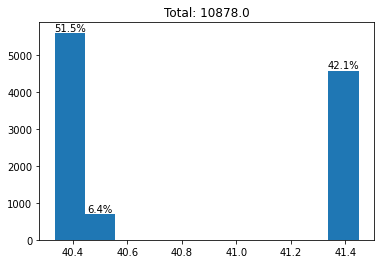

[2] : 
 ** Median latitude : 40.43115 
  ** Average latitude: 40.72635662143822 
  ** STD latitude: 0.4481534445919787


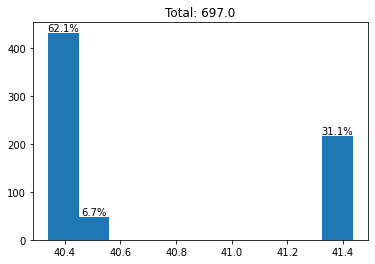

++++++++++++++++++LONGITUDE+++++++++++++++++++++++++
[1] : 
 ** Median longitude : -3.621885 
  ** Average longitude: -0.9270163401547709 
  ** STD longitude: 2.924705333969929


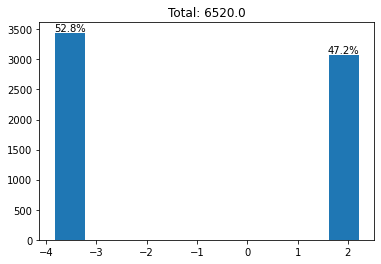

[0] : 
 ** Median longitude : -3.67525 
  ** Average longitude: -1.2275577545767267 
  ** STD longitude: 2.89522348060985


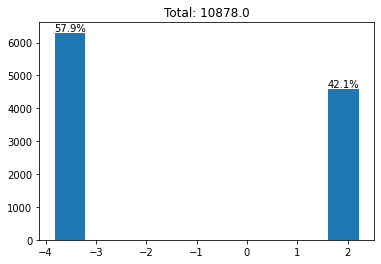

[2] : 
 ** Median longitude : -3.67659 
  ** Average longitude: -1.8617922481499973 
  ** STD longitude: 2.7113545552443568


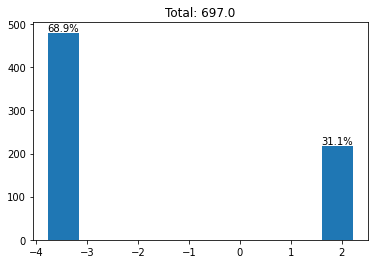

++++++++++++++++++ROOM_TYPE+++++++++++++++++++++++++
[1] : 
 ** Median room_type : 2.0 
  ** Average room_type: 1.9719325153374234 
  ** STD room_type: 0.19181904690794543


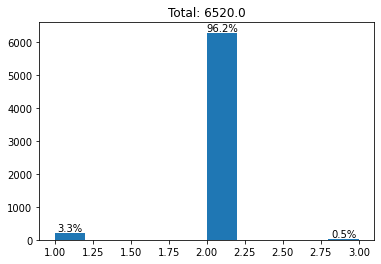

[0] : 
 ** Median room_type : 4.0 
  ** Average room_type: 3.9900717043574185 
  ** STD room_type: 0.09914952498491797


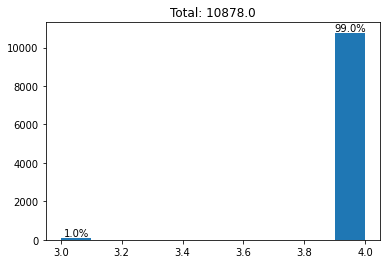

[2] : 
 ** Median room_type : 4.0 
  ** Average room_type: 3.407460545193687 
  ** STD room_type: 0.939461515154


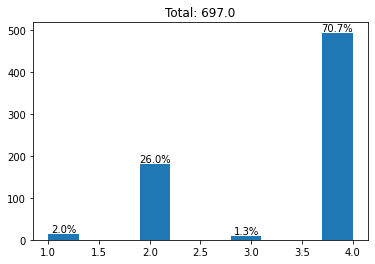

++++++++++++++++++PRICE+++++++++++++++++++++++++
[1] : 
 ** Median price : 40.0 
  ** Average price: 52.50782208588957 
  ** STD price: 42.79049158192289


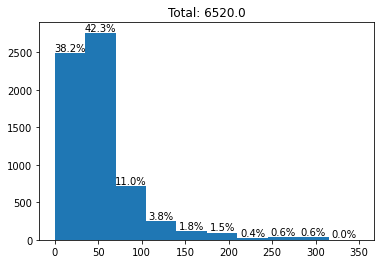

[0] : 
 ** Median price : 100.0 
  ** Average price: 114.53153153153153 
  ** STD price: 58.53752615105081


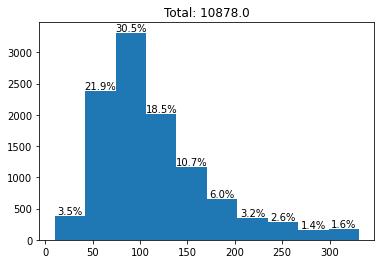

[2] : 
 ** Median price : 480.0 
  ** Average price: 537.9799139167862 
  ** STD price: 196.59039671033835


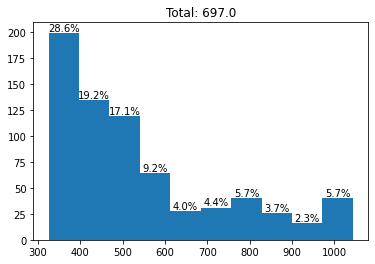

++++++++++++++++++MINIMUM_NIGHTS+++++++++++++++++++++++++
[1] : 
 ** Median minimum_nights : 2.0 
  ** Average minimum_nights: 9.487269938650307 
  ** STD minimum_nights: 37.5349608334464


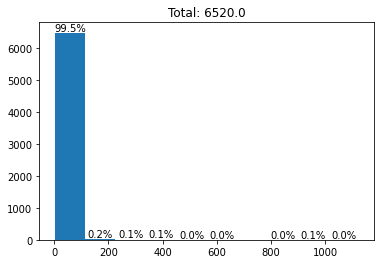

[0] : 
 ** Median minimum_nights : 3.0 
  ** Average minimum_nights: 10.474995403566831 
  ** STD minimum_nights: 26.44815129768707


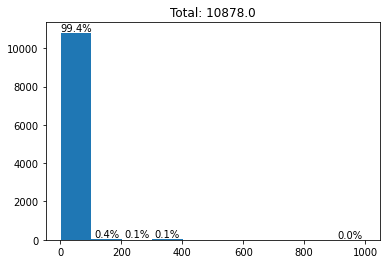

[2] : 
 ** Median minimum_nights : 1.0 
  ** Average minimum_nights: 8.522238163558105 
  ** STD minimum_nights: 51.07535993690673


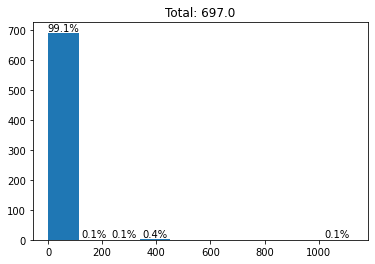

++++++++++++++++++NUMBER_OF_REVIEWS+++++++++++++++++++++++++
[1] : 
 ** Median number_of_reviews : 6.0 
  ** Average number_of_reviews: 28.99110429447853 
  ** STD number_of_reviews: 64.67227431835356


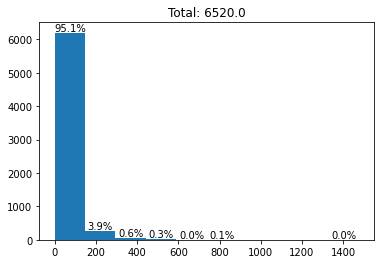

[0] : 
 ** Median number_of_reviews : 13.0 
  ** Average number_of_reviews: 50.63127413127413 
  ** STD number_of_reviews: 85.33574080470144


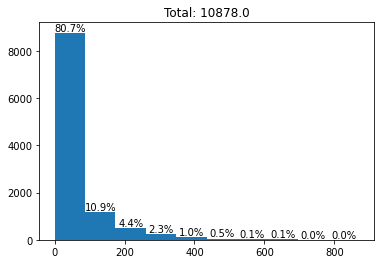

[2] : 
 ** Median number_of_reviews : 1.0 
  ** Average number_of_reviews: 22.16499282639885 
  ** STD number_of_reviews: 52.63810551347153


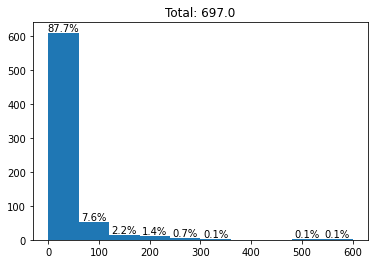

++++++++++++++++++REVIEWS_PER_MONTH+++++++++++++++++++++++++
[1] : 
 ** Median reviews_per_month : 0.74 
  ** Average reviews_per_month: 1.5080486346422164 
  ** STD reviews_per_month: 2.07120753117297


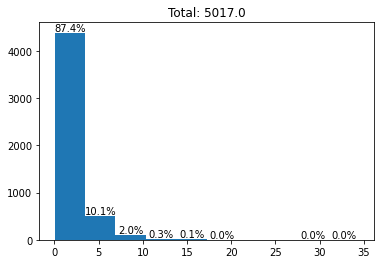

[0] : 
 ** Median reviews_per_month : 1.12 
  ** Average reviews_per_month: 1.6120103092783504 
  ** STD reviews_per_month: 1.6435287177106326


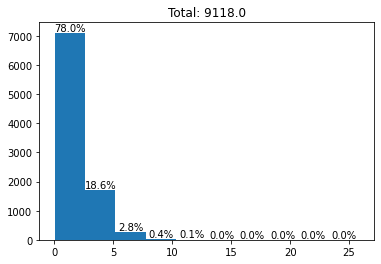

[2] : 
 ** Median reviews_per_month : 0.765 
  ** Average reviews_per_month: 1.0902051282051282 
  ** STD reviews_per_month: 1.174182627248852


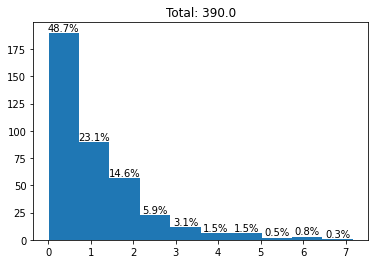

++++++++++++++++++CALCULATED_HOST_LISTINGS_COUNT+++++++++++++++++++++++++
[1] : 
 ** Median calculated_host_listings_count : 2.0 
  ** Average calculated_host_listings_count: 6.712576687116565 
  ** STD calculated_host_listings_count: 16.157043796110425


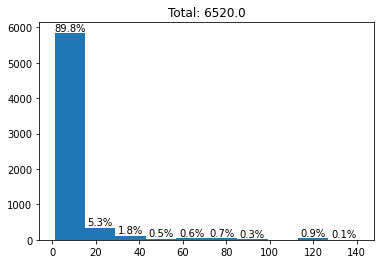

[0] : 
 ** Median calculated_host_listings_count : 5.0 
  ** Average calculated_host_listings_count: 23.660967089538516 
  ** STD calculated_host_listings_count: 41.82022585408786


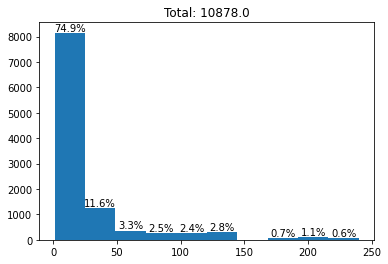

[2] : 
 ** Median calculated_host_listings_count : 2.0 
  ** Average calculated_host_listings_count: 26.694404591104735 
  ** STD calculated_host_listings_count: 57.644719282646804


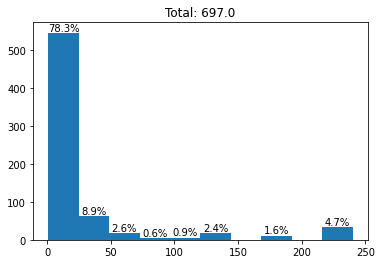

++++++++++++++++++AVAILABILITY_365+++++++++++++++++++++++++
[1] : 
 ** Median availability_365 : 85.0 
  ** Average availability_365: 143.90061349693252 
  ** STD availability_365: 146.70239855229


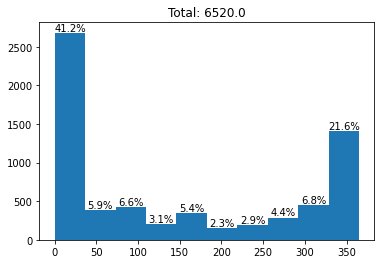

[0] : 
 ** Median availability_365 : 200.0 
  ** Average availability_365: 191.5547894833609 
  ** STD availability_365: 129.56272837272306


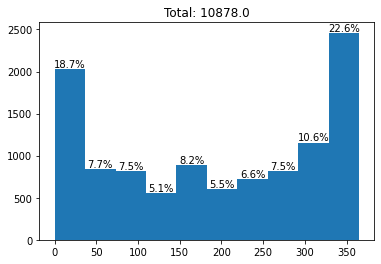

[2] : 
 ** Median availability_365 : 246.0 
  ** Average availability_365: 214.90243902439025 
  ** STD availability_365: 138.3138784573973


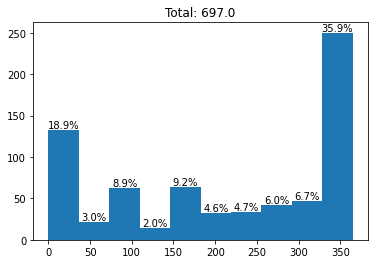

++++++++++++++++++NUMBER_OF_REVIEWS_LTM+++++++++++++++++++++++++
[1] : 
 ** Median number_of_reviews_ltm : 1.0 
  ** Average number_of_reviews_ltm: 9.57116564417178 
  ** STD number_of_reviews_ltm: 21.952070183853255


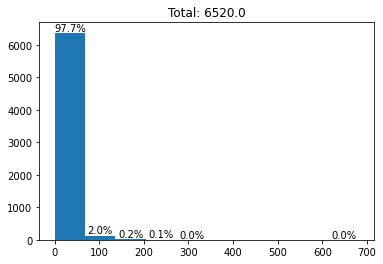

[0] : 
 ** Median number_of_reviews_ltm : 6.0 
  ** Average number_of_reviews_ltm: 14.9434638720353 
  ** STD number_of_reviews_ltm: 21.219539233821678


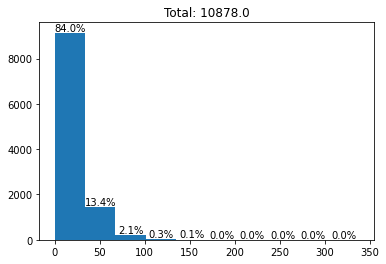

[2] : 
 ** Median number_of_reviews_ltm : 0.0 
  ** Average number_of_reviews_ltm: 6.5767575322812055 
  ** STD number_of_reviews_ltm: 12.203267856105146


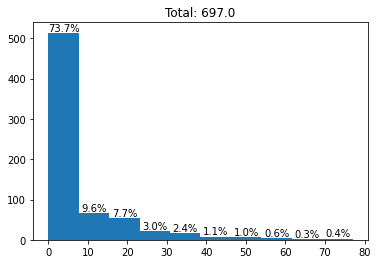

++++++++++++++++++SOURCE+++++++++++++++++++++++++
[1] : 
 ** Median source : 2.0 
  ** Average source: 1.5280674846625766 
  ** STD source: 0.49924988222388156


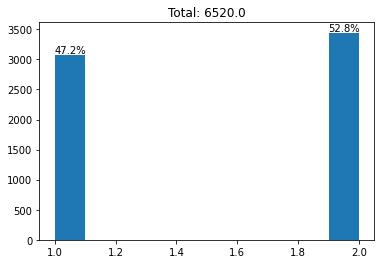

[0] : 
 ** Median source : 2.0 
  ** Average source: 1.5789667218238648 
  ** STD source: 0.4937475750086374


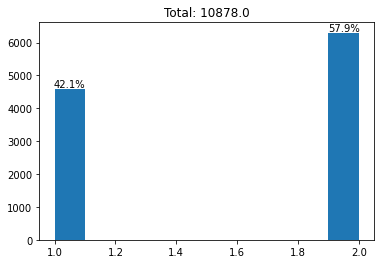

[2] : 
 ** Median source : 2.0 
  ** Average source: 1.6886657101865137 
  ** STD source: 0.4633716686631216


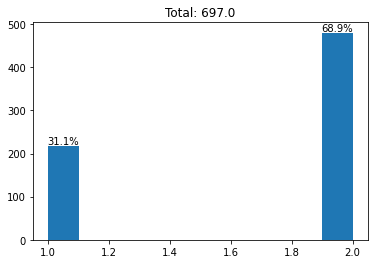

In [ ]:
for col in fields:
  print(f"++++++++++++++++++{col.upper()}+++++++++++++++++++++++++")
  for i in list(df['kcluster'].unique()):
    plot_func([int(i)], 'kcluster', col)

##### Just text

In [ ]:
def report_func(isin_list, field, what_we_want):

  median_p = df.loc[df[field].isin(isin_list), what_we_want].median()
  average_p = df.loc[df[field].isin(isin_list), what_we_want].mean()
  std_p = df.loc[df[field].isin(isin_list), what_we_want].std()

  print(f'{isin_list} : \n ** Median {what_we_want} : {median_p} \n\
  ** Average {what_we_want}: {average_p} \n\
  ** STD {what_we_want}: {std_p}')

In [ ]:
for col in fields:
  print(f"++++++++++++++++++{col.upper()}+++++++++++++++++++++++++")
  for i in list(df['kcluster'].unique()):
    report_func([int(i)], 'kcluster', col)

++++++++++++++++++LATITUDE+++++++++++++++++++++++++
[1] : 
 ** Median latitude : 40.470173048181316 
  ** Average latitude: 40.879286582520734 
  ** STD latitude: 0.48581849629768664
[0] : 
 ** Median latitude : 40.439350000000005 
  ** Average latitude: 40.8300619237586 
  ** STD latitude: 0.4794925630455214
[2] : 
 ** Median latitude : 40.43115 
  ** Average latitude: 40.72635662143822 
  ** STD latitude: 0.4481534445919787
++++++++++++++++++LONGITUDE+++++++++++++++++++++++++
[1] : 
 ** Median longitude : -3.621885 
  ** Average longitude: -0.9270163401547709 
  ** STD longitude: 2.924705333969929
[0] : 
 ** Median longitude : -3.67525 
  ** Average longitude: -1.2275577545767267 
  ** STD longitude: 2.89522348060985
[2] : 
 ** Median longitude : -3.67659 
  ** Average longitude: -1.8617922481499973 
  ** STD longitude: 2.7113545552443568
++++++++++++++++++ROOM_TYPE+++++++++++++++++++++++++
[1] : 
 ** Median room_type : 2.0 
  ** Average room_type: 1.9719325153374234 
  ** STD room_t

##### Conclusions from this part:
Some things that stand out: (median values in brackets)

> Regarding room types:
* Cluster 0 has :: Entire home/apt [99.0 %]
* Cluster 1 :: Private room [96.2 %]
* Cluster 2 has ::  Entire home/apt [70.7 %] ; Private room [26.0 %]

> Regarding price:
* Cluster 0 has a medium price (100) 
* Cluster 1 has the lowest mean and median price (40)
* Cluster 2 stands out with a higher price (480)

> Regarding minimum nights:
* It's safe to say that there are no huge differences here
		The number of minimum nigths lowers from cluster 0 (3) to 1 (2) to 2 (1)

> Regarding number of reviews:
* Number of reviews lower from cluster 0 (13) to 1 (6) to 2 (1). The same trend is apparent in number of reviews per month and the number of reviews *ltm*.

> Host listings:
* Cluster 0 has the most: 5
* Cluster 1 and 2 have the same median value: 2, but {from above}

> Availability:
* Generally no apparent differences (in plots) :: 0 (200) ; 1 (85) ; 2 (246)

> Source:  [ 1 |  2 ] 
* 0 : [  42.1  |  57.9  ]
* 1 : [  47.2  |  52.8  ]
* 2 : [  31.1  |  68.9  ]

    Cluster 2 is notably different in it’s constitution compared to clusters 0 and 1. 
    It contains more of source 2 (‘Madrid’).




### Distributions of clusters regarding the different neighbourhoods

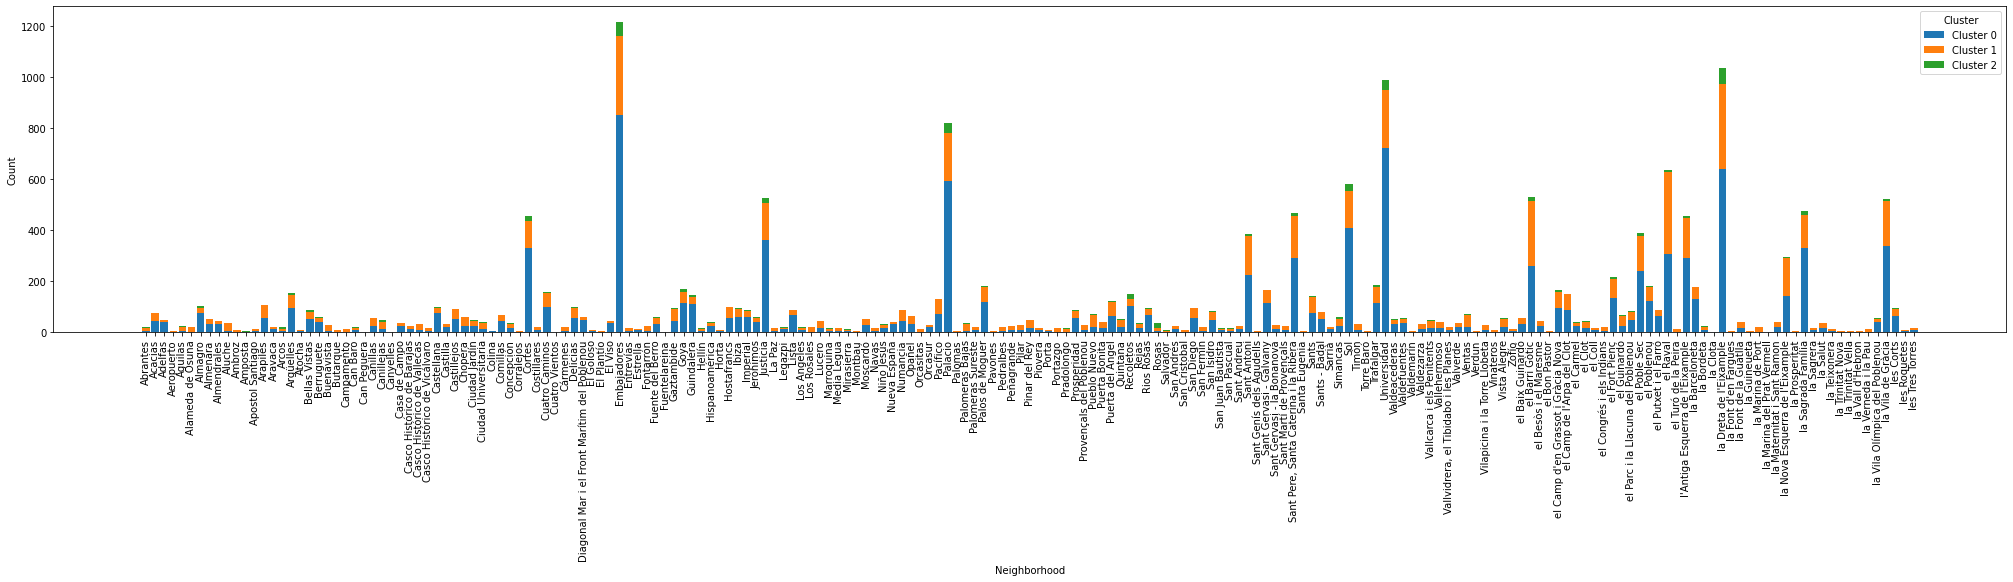

In [ ]:
groupedkc = df.groupby(['neighbourhood', 'kcluster']).size().unstack()

# Create a stacked bar plot for each neighborhood
fig, ax = plt.subplots(figsize=(35, 6))
for i, col in enumerate(groupedkc.columns):
    ax.bar(groupedkc.index, groupedkc[col], bottom=np.sum(groupedkc.iloc[:, :i], axis=1), label=f'Cluster {col}')

# Set the x- and y-axis labels, and the legend
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Count')
ax.legend(title='Cluster')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()


Here, we can see the constitution of the different neighbourhoods in terms of what percent of their listings belong to the different clusters. 

From this plot there isn't any notable difference in one neighbourhood with respect to the others in terms of the constitution. However, a certain similarity can be noticed. All neighboourhoods seem to have the most of Cluster 0, then less of Cluster 1 and the least of Cluster 2. 

### Counts in neighbourhoods

I decided that a good way to analyse this would be to create a dataframe of the counts of the different clusters in each neighbourhood.

kcluster                      0    1   2
neighbourhood                           
la Dreta de l'Eixample      641  331  63
el Raval                    307  319   8
Embajadores                 851  309  55
el Barri Gòtic              260  253  15
Universidad                 720  230  39
...                         ...  ...  ..
Canyelles                     0    1   0
Valdemarín                    3    1   0
Fuentelareina                 0    1   0
la Clota                      0    1   0
la Marina del Prat Vermell    1    0   0

[195 rows x 3 columns]

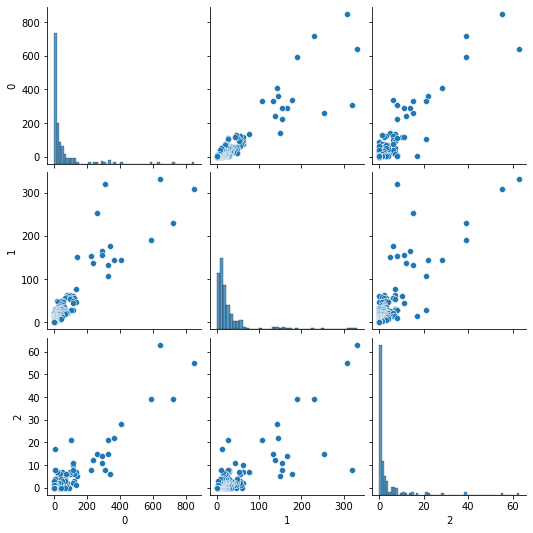

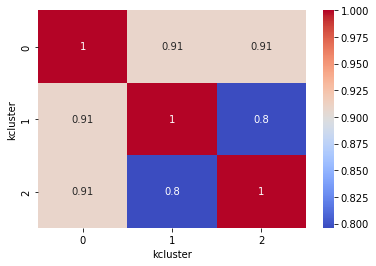

In [ ]:
# Group the data by neighborhood and count the number of entries in each cluster
cluster_countkc = df.groupby('neighbourhood')['kcluster'].value_counts().unstack().fillna(0).astype(int)

# Sort the table by the count of Cluster 1 in ascending order
sorted_countskc = cluster_countkc.sort_values(by=[1], ascending=False)

# Print the sorted table
display(sorted_countskc)

sns.pairplot(sorted_countskc)
plt.show()

sns.heatmap(sorted_countskc.corr(), annot=True, cmap='coolwarm')
plt.show()


##### General constitution of neighbourhoods

Because of the high correlation values, we can say that there does appear to be a ratio which is general for all neighbourhoods. So, the counts of the different clusters are mostly a fucntion of the size of the neighbourhood (the number of listings).

$ (C_0, C_1, C_2) = f(N_{listings})$

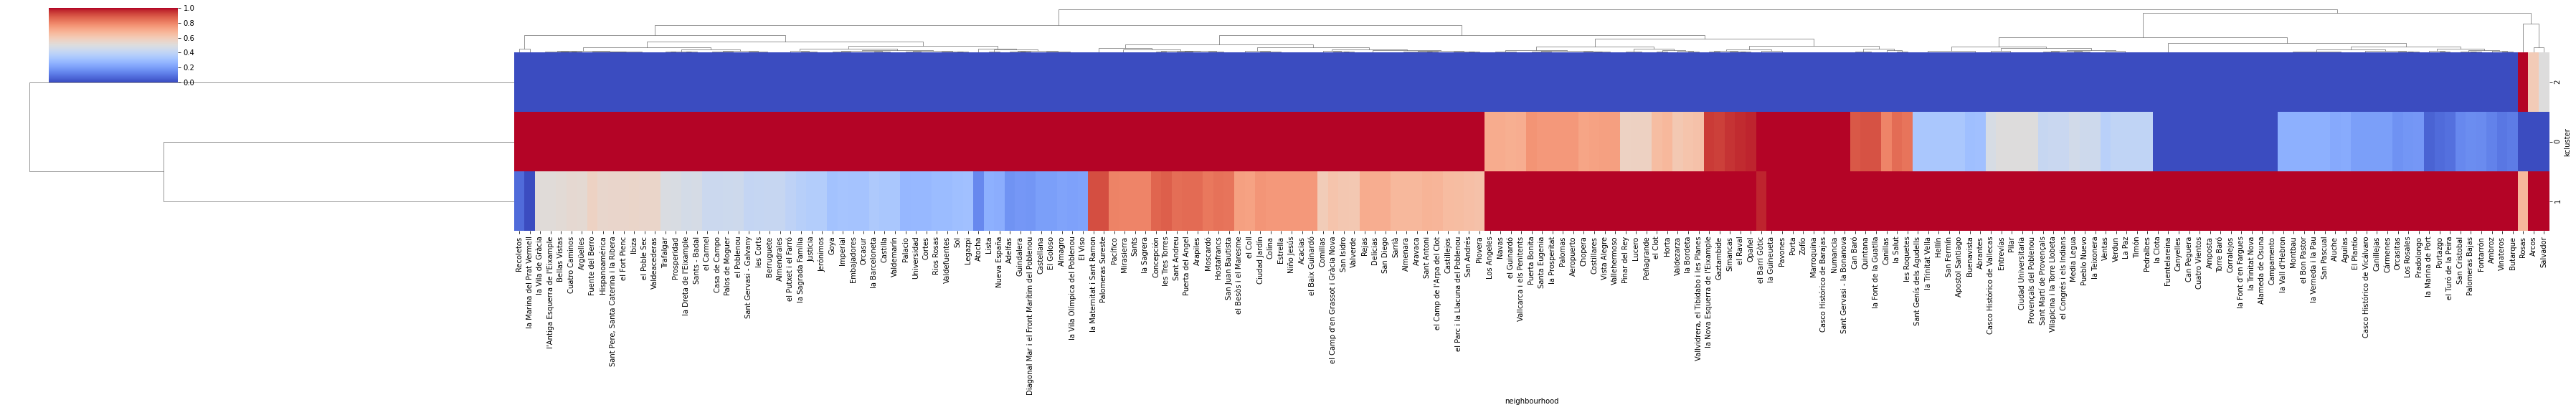

In [ ]:
sns.clustermap(sorted_countskc.T, cmap='coolwarm', figsize=(50, 8), metric='euclidean', standard_scale=True)

##### Something that stands out

From this clustermap however, we can definitely see a pattern. For the first half of the neighbourhoods, there seems to be a general agreement of it's frequency in cluster 0, then the second half is mostly in cluster 1 and only a few members are in cluster 2. 

Notably, Rosas is in cluster 2, and this is meaningful because in a later plot we will see that Rosas has one of the highest prices. So it makes sence that's in the cluster with the high price.

### Neighbourhoods with one cluster

In [ ]:
%%capture
!pip install matplotlib-venn
from matplotlib_venn import venn3

intersection: 128 {'el Baix Guinardó', 'Pinar del Rey', 'Puerta Bonita', 'Can Baró', 'Lista', 'el Poblenou', 'Porta', 'Opañel', 'la Sagrada Família', 'Salvador', 'Castilla', 'Abrantes', 'San Isidro', 'San Juan Bautista', 'la Marina de Port', 'Sant Andreu', 'Palacio', 'Niño Jesús', 'Cuatro Caminos', "la Nova Esquerra de l'Eixample", 'Berruguete', 'Apostol Santiago', 'Sants - Badal', 'Valdeacederas', 'la Bordeta', 'Sant Gervasi - Galvany', 'el Guinardó', 'Rosas', 'Arapiles', 'Sant Gervasi - la Bonanova', 'Delicias', 'Casa de Campo', 'la Font de la Guatlla', 'Canillejas', 'Legazpi', 'Ciudad Universitaria', 'Ventas', 'la Vila Olímpica del Poblenou', 'Palomeras Bajas', 'Recoletos', 'Puerta del Angel', 'Goya', 'Alameda de Osuna', 'Castillejos', 'Zofío', 'Arcos', 'Rejas', 'Almagro', 'Sant Antoni', 'Cortes', 'El Viso', 'Sol', 'Peñagrande', 'Sant Pere, Santa Caterina i la Ribera', 'Simancas', 'Quintana', 'Vista Alegre', 'San Pascual', 'el Poble Sec', 'La Paz', "el Camp d'en Grassot i Gràcia Nov

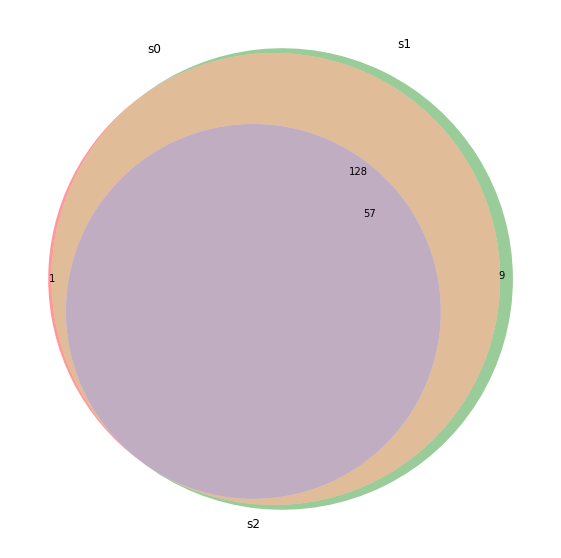

In [ ]:
s0 = set(df.loc[df['kcluster'].isin([0]), 'neighbourhood'].unique())
s1 = set(df.loc[df['kcluster'].isin([1]), 'neighbourhood'].unique())
s2 = set(df.loc[df['kcluster'].isin([2]), 'neighbourhood'].unique())

s123 = s0.intersection(s1).intersection(s2)
print('intersection:', len(s123), s123)
s0_U = s0 - s1 - s2
s1_U = s1 - s0 - s2
s2_U = s2 - s1 - s0
print('s0 unique:', len(s0_U), s0_U)
print('s1 unique:', len(s1_U), s1_U)
print('s2 unique:', len(s2_U), s2_U)

fig, ax = plt.subplots(figsize=(20, 10))
venn3([s0, s1, s2], ['s0', 's1', 's2'])
plt.show()
# I expanded the diagram to make it more easily visible, but it still doesn't look good

Most of the neighbourhoods are made up of all 3 clusters, however some neighbourhoods have only 1 type of cluster:

* Only cluster 0 : la Marina del Prat Vermell

* Only cluster 1 : Cuatro Vientos, Fuentelareina, Canyelles, la Clota, la Font d'en Fargues, Campamento, Torre Baró, Can Peguera, la Trinitat Nova

### Multivariate visualisations

In [ ]:
import plotly.express as px

In [ ]:
for col in fields:
  print(f'+++++++++++++++++++++{col.upper()}+++++++++++++++++++++')
  fig = px.scatter_3d(df, x='price', 
                      y='room_type', 
                      z=col, 
                      color='kcluster')
  fig.show()

+++++++++++++++++++++LATITUDE+++++++++++++++++++++


+++++++++++++++++++++LONGITUDE+++++++++++++++++++++


+++++++++++++++++++++ROOM_TYPE+++++++++++++++++++++


+++++++++++++++++++++PRICE+++++++++++++++++++++


+++++++++++++++++++++MINIMUM_NIGHTS+++++++++++++++++++++


+++++++++++++++++++++NUMBER_OF_REVIEWS+++++++++++++++++++++


+++++++++++++++++++++REVIEWS_PER_MONTH+++++++++++++++++++++


+++++++++++++++++++++CALCULATED_HOST_LISTINGS_COUNT+++++++++++++++++++++


+++++++++++++++++++++AVAILABILITY_365+++++++++++++++++++++


+++++++++++++++++++++NUMBER_OF_REVIEWS_LTM+++++++++++++++++++++


+++++++++++++++++++++SOURCE+++++++++++++++++++++


##### Some things that stand out:

> Minimum nights:
* Whereas cluster 0 and 1 are more dispersed in this regard, cluster 2 seems to be mosly low fot the minimum nights.

> Number of reviews:
* The same patter appears. Clusters 0 and 1 have more reviews and cluster 2 has generally the least reviews. An exception is for the room type 4 (Entire home/apt) in cluster 2, which compared to the other room types in that cluster, has a higher number of reviews. The same behavious is apparent in the reviews per month and the reviews *ltm*.

> Host listings:
There doesn't appear to be a pattern regarding host listings and cluster, however it's intresting to note that for room type 4 (Entire home/apt) there are the most host listings.

> Source: 
* The only notable thing is that there are more Shared rooms (1) and Private rooms (2) of cluster 2 in the location 2 (Madrid) then in location 1.


## Statistics of some fields of interest:

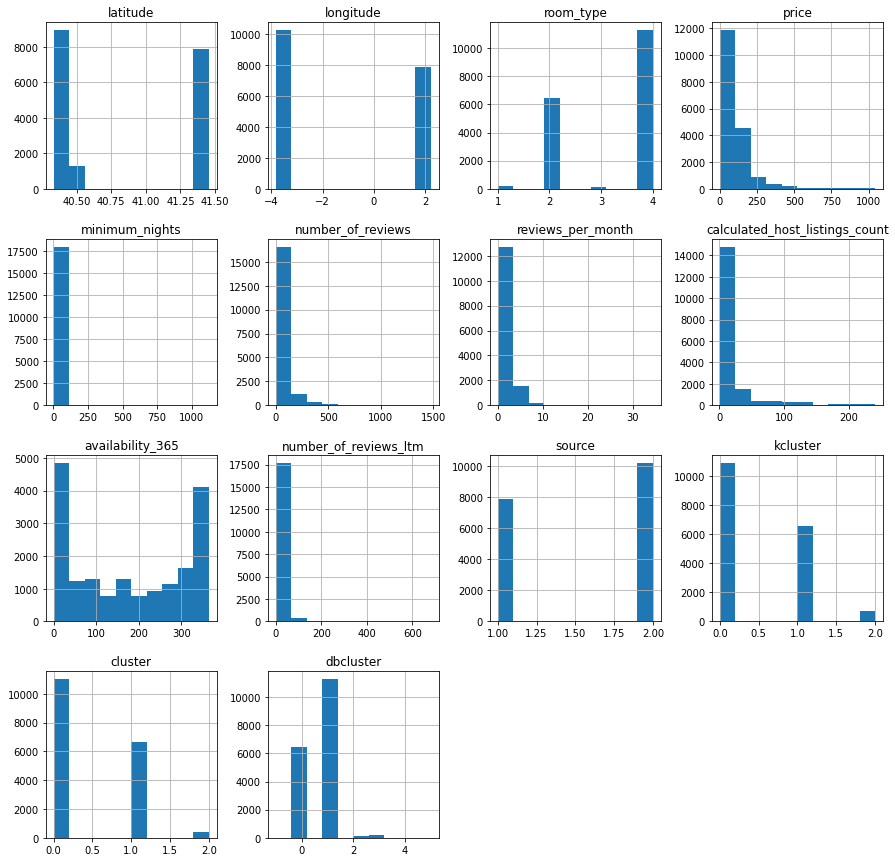

In [ ]:
df.hist(figsize=(15,15))
plt.show()

In [ ]:
def statistic_plot_for_rooms(number, name):
  print(f"\n\n---------------------- {name.upper()} ------------------------------")
  counts, bins, _ = plt.hist(df.loc[df['room_type'].isin([number]), 'price'])

  median_p = df.loc[df['room_type'].isin([number]), 'price'].median()
  average_p = df.loc[df['room_type'].isin([number]), 'price'].mean()

  print(f'\n{name} : \n ** Median price : {median_p} \n ** Average: {average_p}\n')

  # Calculate the total count
  total_count = sum(counts)

  # Iterate over the bins and add a text label showing the count
  for i, count in enumerate(counts):
      x = (bins[i] + bins[i+1]) / 2
      y = count
      label = f"{count/total_count*100:.1f}%"
      if count != 0:
        plt.text(x, y, label, ha='center', va='bottom')

  plt.title(f"Total number: {total_count}")
  plt.show()



---------------------- SHARED ROOM ------------------------------

Shared room : 
 ** Median price : 27.0 
 ** Average: 85.03508771929825



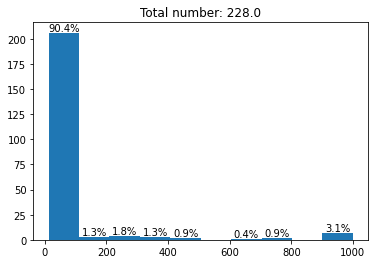



---------------------- PRIVATE ROOM ------------------------------

Private room : 
 ** Median price : 40.0 
 ** Average: 67.90814745972739



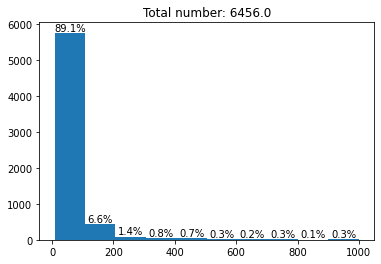



---------------------- HOTEL ROOM ------------------------------

Hotel room : 
 ** Median price : 119.0 
 ** Average: 147.2972972972973



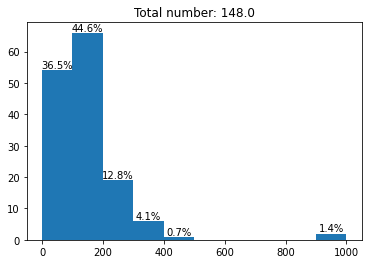



---------------------- ENTIRE HOME/APT ------------------------------

Entire home/apt : 
 ** Median price : 102.0 
 ** Average: 131.7228091982598



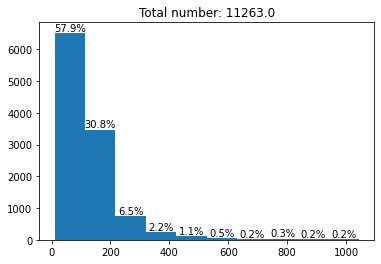

In [ ]:
#({'Entire home/apt': 4, 'Private room': 2, 'Hotel room': 3, 'Shared room': 1}, inplace=True)

statistic_plot_for_rooms(1, "Shared room")
statistic_plot_for_rooms(2, "Private room")
statistic_plot_for_rooms(3, "Hotel room")
statistic_plot_for_rooms(4, "Entire home/apt")


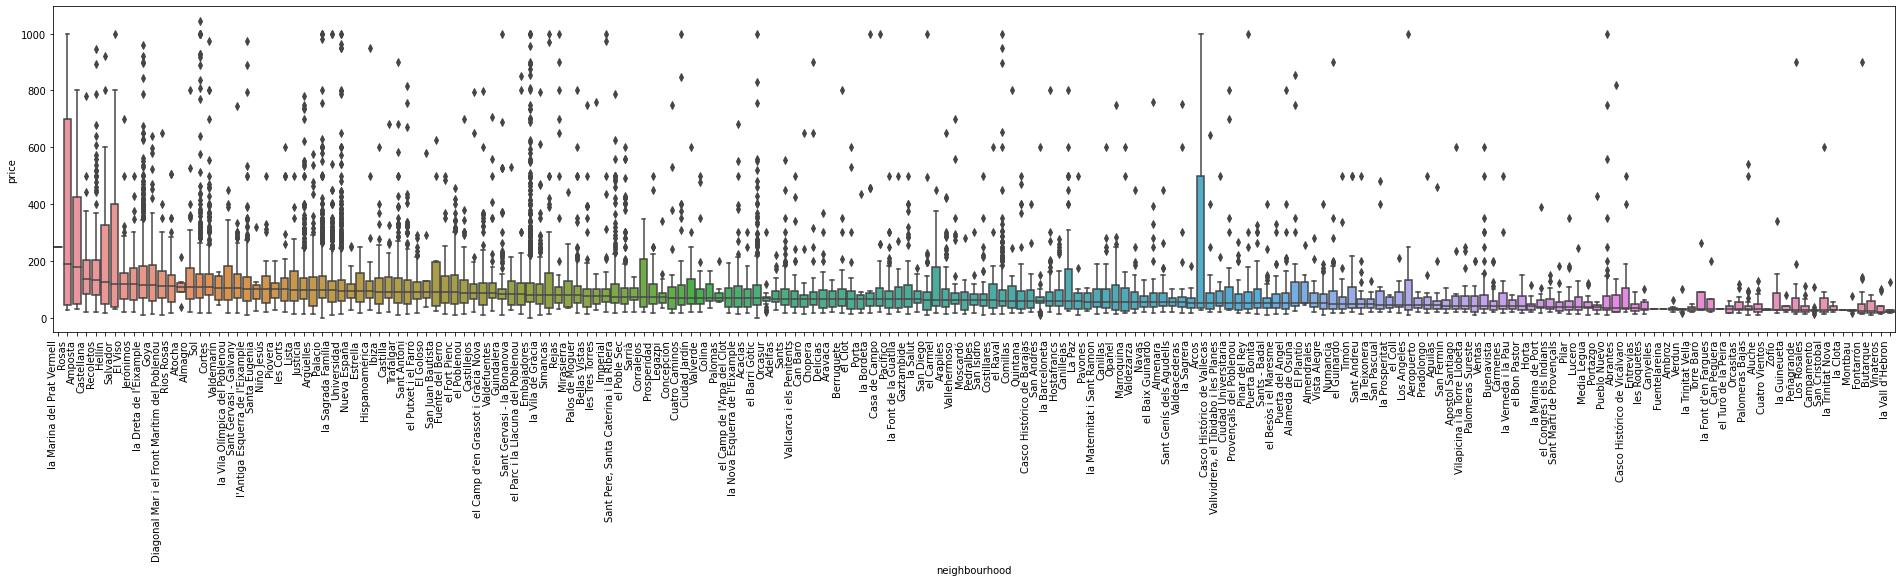

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the median price for each neighborhood and sort them in ascending order
median_prices = df.groupby('neighbourhood')['price'].median().sort_values(ascending=False)

plt.figure(figsize=(33,6)) # set the size of the figure
sns.boxplot(x='neighbourhood', y='price', data=df, order=median_prices.index)
plt.xticks(rotation=90, ha='right') # rotate the x-axis labels and align them to the right
plt.show()


# Conlusions



Cluster 0 consists mainly of entire home/apartment rentals, Cluster 1 is mostly private rooms, and Cluster 2 contains a mix of room types - entire homes/apts and private rooms. The price increases from cluster 1 (40), to cluster 0 (100) and the most expensive is cluster 2 (480).

Cluster 2 has a higher price range than the other two clusters, but also has the lowest number of reviews. This could suggest that the customers of the properties in this cluster are more exclusive, preferring to spend their money on luxury and not bothering with mundane tasks such as writing reviews. Rosas, Madrid, a neighborhood with famously high prices, is in Cluster 2. 

The availability of listings is generally similar across clusters. 

The cluster distribution appears to be primarily a function of the size of the neighborhood. 

Finally, there are more shared and private rooms in Cluster 2 in location 2 (Madrid) than location 1.

In summary, the clusters identified seem to be indicative of two factors: the nature of the listing and the target audience. 
* Cluster 1 appears to cater to ***families*** or ***couples*** seeking value for money in vacation rentals. This is reflected in the predominantly private room listings and reasonable pricing. 
* Cluster 0, on the other hand, targets the ***adventurous traveler*** who desires to explore as much of the world as possible without spending a fortune. While this cluster is primarily composed of entire home/apartment listings, it's possible that visitors may be sharing the space with their hosts. 
* Finally, cluster 2 is geared towards individuals who value ***luxury*** and ***convenience*** over mundane tasks like leaving reviews. Given its higher price range and mostly private room and entire home/apartment listings, it's likely that visitors have the entire space to themselves compared to cluster 0.
